In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/CV_FinalProject
print("===============")
!ls 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/.shortcut-targets-by-id/1rvVQN848IG4yYS2DU7AHiKiDnungjDoK/CV_FinalProject
 ACFrOgA-LDXeavfNaEi4JheMtzblZOGNwXji8xdWbxw5euLNXjcDCWzcYCz3GTeDKg6j8dpNpSXSPs1opj76ZQrkvWbsVnVlutbbg05b8_RW9t9Tln27MwJp4MVzfB9VTBcaK6-4MitBR0ge7aIf.pdf
 captions_test.gdoc
 captions_test.txt
 Data
 De-Cuong-CV.docx
 Dungmn
'Final Project VinCV Image Captioning for Vietnamese.gslides'
'Final Project VinNLP Image Captioning for Vietnamese.pptx'
 MTam
 Nhat
 Phalc
'Preprocessing UIT-ViIC.gsheet'


#load UIT-ViLC dataset

In [ ]:
ls Dungmn/result/

preprocessed_test_result_Resnet512_LSTM_pyvi.json
preprocessed_val_result_Resnet512_LSTM_pyvi.json
result_Resnet512_LSTM_1e4.json
result_Resnet512_LSTM.json
Test_Attention_TF.json
test_result_Resnet512_LSTM_1e4.json
test_result_Resnet512_LSTM_pyvi.json
val_result_Resnet512_LSTM_pyvi.json


In [ ]:
import json

dataset_path = 'Data/UIT-ViIC/'
# with open(dataset_path + 'uitviic_captions_val2017.json') as f:
#   train_data = json.load(f)

with open("Dungmn/result/Test_Attention_TF.json") as f:
  train_data = json.load(f)

# print(len(train_data['images']))


In [ ]:
def convert_predicted_sentences_to_plain_sentence(string):
    string = string.replace("<start> ", '')
    string = string.replace('_', ' ')
    string = string.replace('<end>', '.')
    string = string.strip()
    return string

In [ ]:
for i,data in enumerate(train_data):
    # train_data[i]['caption'] = convert_predicted_sentences_to_plain_sentence(data['caption'])
    print(data)

{'id': 0, 'image_id': 7615, 'caption': 'cầu thủ bóng chày đứng trên sân một trận thi đấu bóng chày .'}
{'id': 1, 'image_id': 351855, 'caption': 'vận động viên tennis đang cầm vợt thi đấu trên sân .'}
{'id': 2, 'image_id': 208006, 'caption': 'một người đàn ông đang vung vợt để đánh quả bóng chày đứng trên sân .'}
{'id': 3, 'image_id': 118272, 'caption': 'hai người đàn ông áo xanh đang đứng gần những quả bóng tennis .'}
{'id': 4, 'image_id': 176477, 'caption': 'người phụ nữ đang chơi tennis trên sân .'}
{'id': 5, 'image_id': 14864, 'caption': 'một người phụ nữ váy trắng đang thi đấu tennis ở trên sân .'}
{'id': 6, 'image_id': 256884, 'caption': 'một người phụ nữ đang nhảy lên để đánh bóng .'}
{'id': 7, 'image_id': 123731, 'caption': 'người phụ nữ đang vung vợt để ném bóng .'}
{'id': 8, 'image_id': 59252, 'caption': 'các cầu thủ bóng đá đang thi đấu ở trên sân với nhau ở trên sân .'}
{'id': 9, 'image_id': 515075, 'caption': 'những đứa trẻ đang chơi bóng chày trên sân .'}
{'id': 10, 'image

In [ ]:
import json
with open('Dungmn/result/Test_Attention_TF.json', 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent=4)

In [ ]:
ls Data/UIT-ViIC/train_imgs/*.jpg -1 |wc -l

2695


#Edit annos


In [ ]:
import pandas as pd

df = pd.read_csv("Dungmn/correct_captions_val.csv", names=['image_id','cap_id','caption'])
df

,image_id,cap_id,caption
0,314357,15159,Hai người đàn ông đang chơi bóng đá trên sân .
1,498204,6058,Cầu thủ bóng chày đang cầm gậy đứng trên sân n...
2,337038,16688,Vận động viên bóng chày đang cầm gậy thi đấu t...
3,522256,3920,Hai đứa trẻ cầm gậy bóng chày chơi ngoài vườn .
4,556342,14864,Ở dưới chân núi
...,...,...,...
186,58073,761,Có một con chó nằm trên chăn .
187,58073,8128,một con chó lớn trên giường có một cái gì đó t...
188,338501,4122,Người đàn ông mặc đồ trắng đang chơi bóng chày...
189,207943,18507,Cầu thủ bóng chày đang thực hiện động tác ném ...


In [ ]:
df_none = df[df.caption == "None"]
img_none = df_none.image_id.to_list()
type(img_none[0])

int

In [ ]:
print(len(train_data['images']))

2688


In [ ]:
cnt=0
for index, img in enumerate(train_data['images']):
    if img['id'] in img_none:
        del train_data['images'][index]
        cnt = cnt + 1
print(f"Removed {cnt} images")

Removed 0 images


In [ ]:
train_data['annotations'][0]

{'caption': 'Người đàn ông đang đánh tennis ngoài sân.',
 'id': 4990,
 'image_id': 157656}

In [ ]:
cnt=0
for index, ann in enumerate(train_data['annotations']):
    if ann['image_id'] in img_none:
        del train_data['images'][index]
        cnt = cnt + 1
print(f"Removed {cnt} images")

1054
Một nam vận động viên tennis đang bàn bạc chiến thuật với huấn luyện viên .
3002
Người đàn ông đang chạy tới vung vợt tennis đánh trả bóng .
7045
Vận động viên tennis nữ đứng trên sân cầm vợt và bóng .
7530
Hình ảnh của hai đứa trẻ đang chơi bóng đá trên sân .
8125
Cầu thủ bóng chày đang cầm gậy đứng thấp người đánh bóng .
9817
Có một người đang đưa vợt tennis lên cao đứng trong tối .
12190
Hai đứa trẻ đang chạy về phía bóng trên sân cỏ .


In [ ]:
train_data['annotations'][1054]['caption']

'Một nam vận động viên tennis đang bàn bạc chiến thuật với huấn luyện viên .'

In [ ]:
def getIndexCap(row):
    for idx,ann in enumerate(train_data['annotations']):
        if ann['image_id'] == row['image_id'] and ann['id'] == int(row['cap_id']):
             return idx
    return -1

In [ ]:
cnt = 0
for index, row in df.iterrows():
    if row['caption'] != "None":
        id = getIndexCap(row)
        print("ID: ", id)
        print(f"Before {train_data['annotations'][id]['caption']}")
        train_data['annotations'][id]['caption'] = row['caption']
        print(f"After {train_data['annotations'][id]['caption']}")
        cnt +=1

    else:
        assert "None Caption!"
print("Total: ",cnt)

ID:  463
Before Hai người đàn ông đang chơi bóng đá trên sân / .
After Hai người đàn ông đang chơi bóng đá trên sân .
ID:  2866
Before Cầu thủ bóng chày đang cầm gậy đứng trên sân nhà sắn sàng đỡ bóng .
After Cầu thủ bóng chày đang cầm gậy đứng trên sân nhà sẵn sàng đỡ bóng .
ID:  4619
Before Vận đọng viên bóng chày đang cầm gậy thi đấu trên sân .
After Vận động viên bóng chày đang cầm gậy thi đấu trên sân .
ID:  4441
Before Hai đứa trẻ cầm gậy bóng chày chơi ngoài vường .
After Hai đứa trẻ cầm gậy bóng chày chơi ngoài vườn .
ID:  4322
Before Ở dưới chân núi , , ột nhóm người đang đứng rải rác với quả bóng đá ở trên sân cạnh chân núi .
After Ở dưới chân núi 
ID:  4184
Before Cầu thủ bóng chày nẽ đang thực hiện cú ném bóng .
After Cầu thủ bóng chày nữ đang thực hiện cú ném bóng .
ID:  2333
Before Vận động viên tennis nam đang cầm vợt teinnis đỡ bóng cao .
After Vận động viên tennis nam đang cầm vợt tennis đỡ bóng cao .
ID:  3599
Before Một nữ vận động viên tennsi đang cầm vợt và đứng cạ

In [ ]:
print(len(train_data['images']))
print(len(train_data['annotations']))


2688
13458


In [ ]:
import json
with open(dataset_path + 'preprocessed_uitviic_captions_val2017.json', 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent=4)

#View

In [ ]:
start_id = 227
end_id = 1900

Image_Index: 227
Image_ID: 379944
  
cap_id 6400: Cầu thủ đánh bóng đàng cầm gậy đỡ bóng trên sân .
cap_id 12224: Cầu thủ bóng chày đang vung gậy đánh bóng .
cap_id 13393: Người đàn ông đang chơi bóng chày trên sân cỏ .
cap_id 14793: Cầu thủ bóng chày đang cầm gậy thi đấu trên sân .
cap_id 6476: Cầu thủ bóng chày đang cầm gậy đứng trên sân đánh bóng .


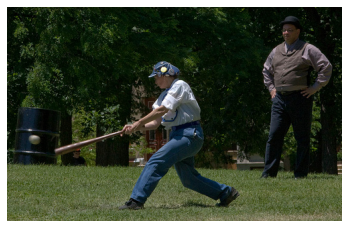

KeyboardInterrupt: ignored

In [ ]:
%matplotlib inline
import cv2
import random
import matplotlib.pyplot as plt
from google.colab import output
from google.colab.patches import cv2_imshow
from time import sleep
from PIL import Image

print(f"Loading images from id {start_id} to {end_id}")
imgs = train_data['images'][start_id:end_id+1]

for idx,img in enumerate(imgs):
    output.clear()
    print(f"Image_Index: {start_id+idx}")
    print(f"Image_ID: \033[1m{img['id']}\033[0m")
    print("  ") 
    # image = cv2.imread(f"Data/UIT-ViIC/train_imgs/{img['file_name']}")
    # cv2_imshow(image)
    for ann in train_data['annotations']:
        if ann['image_id'] == img['id']:
            print(f"cap_id \033[1m{ann['id']}\033[0m: {ann['caption']}")
    
    plt.imshow(Image.open(f"Data/UIT-ViIC/test_imgs/{img['file_name']}"))
    plt.axis('off')
    plt.show()
    sleep(2)
    input("Next Image")

# print(img['file_name'])


In [ ]:
import cv2
img = cv2.imread("Data/UIT-ViIC/test_imgs/000000198054.jpg")
print(img)

None


In [ ]:
ls Data/UIT-ViIC/train_imgs/000000569723.jpg

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Data/UIT-ViIC/train_imgs/000000569723.jpg


In [ ]:
image_id = 566324
image = None
for img in train_data['images']:
    if img['id'] == image_id:
        image = img


In [ ]:
for ann in train_data['annotations']:
    if ann['image_id'] == 566324:
        

{'coco_url': 'http://images.cocodataset.org/train2017/000000569723.jpg',
 'date_captured': '2013-11-21 05:25:03',
 'file_name': '000000569723.jpg',
 'flickr_url': 'http://farm5.staticflickr.com/4118/4757256868_2e383db412_z.jpg',
 'height': 640,
 'id': 569723,
 'license': 2,
 'width': 426}

In [ ]:

import requests
img = requests.get(image['coco_url']).content
with open("Data/UIT-ViIC/train_imgs/000000569723.jpg",'wb') as f:
    f.write(img)

